# GPT-2 from Hugging Face

In [37]:
from transformers import GPT2LMHeadModel

In [38]:
model_hf = GPT2LMHeadModel.from_pretrained('gpt2')
sd_hf = model_hf.state_dict()

In [44]:
model_hf

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [39]:
for k,v in sd_hf.items():
    print(f'{k} : {v.shape}')

transformer.wte.weight : torch.Size([50257, 768])
transformer.wpe.weight : torch.Size([1024, 768])
transformer.h.0.ln_1.weight : torch.Size([768])
transformer.h.0.ln_1.bias : torch.Size([768])
transformer.h.0.attn.c_attn.weight : torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias : torch.Size([2304])
transformer.h.0.attn.c_proj.weight : torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias : torch.Size([768])
transformer.h.0.ln_2.weight : torch.Size([768])
transformer.h.0.ln_2.bias : torch.Size([768])
transformer.h.0.mlp.c_fc.weight : torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias : torch.Size([3072])
transformer.h.0.mlp.c_proj.weight : torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias : torch.Size([768])
transformer.h.1.ln_1.weight : torch.Size([768])
transformer.h.1.ln_1.bias : torch.Size([768])
transformer.h.1.attn.c_attn.weight : torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias : torch.Size([2304])
transformer.h.1.attn.c_proj.weight : torch.Size([768, 7

- `transformer.wte.weight : torch.Size([50257, 768])` :
- 50257: the number of token in GPT-2 vocabulary, 
- 768: d_embed

- `transformer.wpe.weight : torch.Size([1024, 768])`
- 1024: max num of positions

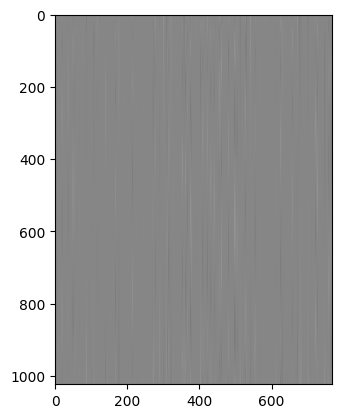

In [40]:
import matplotlib.pyplot as plt

vocab = sd_hf['transformer.wpe.weight']
plt.imshow(vocab, cmap='gray')

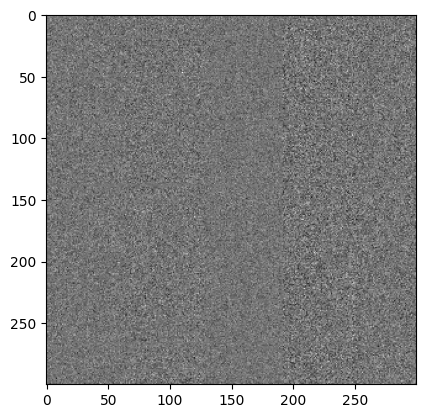

In [41]:
plt.imshow(sd_hf['transformer.h.0.attn.c_attn.weight'][:300, :300], cmap='gray')

In [43]:
from transformers import pipeline, set_seed
set_seed(69)
gen = pipeline('text-generation', model='gpt2')
gen(
    text_inputs='India is the land of',
    max_length = 30, # max number of tokens to sample
    num_return_sequences=5
)

'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: f73fc711-f6b4-4c65-bbac-a5ed96494ed9)')' thrown while requesting HEAD https://huggingface.co/gpt2/resolve/main/config.json
Retrying in 1s [Retry 1/5].
Device set to use mps:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': "India is the land of my dream.\n\nI have never been to India, I have never been to Bangladesh, I have never been to the Maldives.\n\nI never had any other friends in my life.\n\nI was so close to my family, I knew that.\n\nI did not feel at home in India, I was very close to my family, I felt like an outsider in my community.\n\nI felt like I had no one to connect to.\n\nI felt like no one cared about me at all.\n\nI was very lonely.\n\nI was too lonely to work and I felt like I was a burden on my family.\n\nI was poor and had no money.\n\nI was not able to get my education.\n\nI didn't have any friends in my community.\n\nI felt like a burden on my family and my children.\n\nI didn't have any family friends.\n\nI felt like a burden on my village and my village was abandoned.\n\nI was not able to get my education.\n\nI was not able to get my family's support.\n\nI felt like I had no friends in my community, I was very lonely.\n\nI felt like a"},
 {'generated_text':